<a href="https://colab.research.google.com/github/marimsw/Dashbord/blob/main/Xhech_ok.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

cv2: библиотека OpenCV для работы с изображениями.    
numpy: библиотека для работы с массивами и матрицами.    
matplotlib.pyplot: библиотека для визуализации данных.    
random: стандартная библиотека для генерации случайных чисел.    
PIL: библиотека для работы с изображениями.    
imagehash: библиотека для вычисления хэшей изображений.

In [ ]:
!pip install imagehash

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 52.8 MB/s eta 0:00:00


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random
from PIL import Image
import imagehash

Хэш изображения /content/drive/MyDrive/Rabota/Pandas_exel/Dash_plotly_matplotlib/Dmitrii/image/1994949.jpg: 1f03031bfffdf9ff
Хэш изображения /content/drive/MyDrive/Rabota/Pandas_exel/Dash_plotly_matplotlib/Dmitrii/image/1994950.jpg: 1f01031f3ffdfdff
Хэш изображения /content/drive/MyDrive/Rabota/Pandas_exel/Dash_plotly_matplotlib/Dmitrii/image/1994947.jpg: 1f03030fbff9f8ff
Хэш изображения /content/drive/MyDrive/Rabota/Pandas_exel/Dash_plotly_matplotlib/Dmitrii/image/1994477.jpg: ff03f99901c9ff3f
Хэш изображения /content/drive/MyDrive/Rabota/Pandas_exel/Dash_plotly_matplotlib/Dmitrii/image/1994948.jpg: 1f03031dfffdf8ff
Хэш изображения /content/drive/MyDrive/Rabota/Pandas_exel/Dash_plotly_matplotlib/Dmitrii/image/1996145.png: 00e0f979614a5c38
Хэш изображения /content/drive/MyDrive/Rabota/Pandas_exel/Dash_plotly_matplotlib/Dmitrii/image/1998586.jpg: 006864707effffff

Сравнение для изображения 1:
Расстояние Хэмминга для шума 'Гауссовский шум': 21
Расстояние Хэмминга для шума 'Шум соль и пер

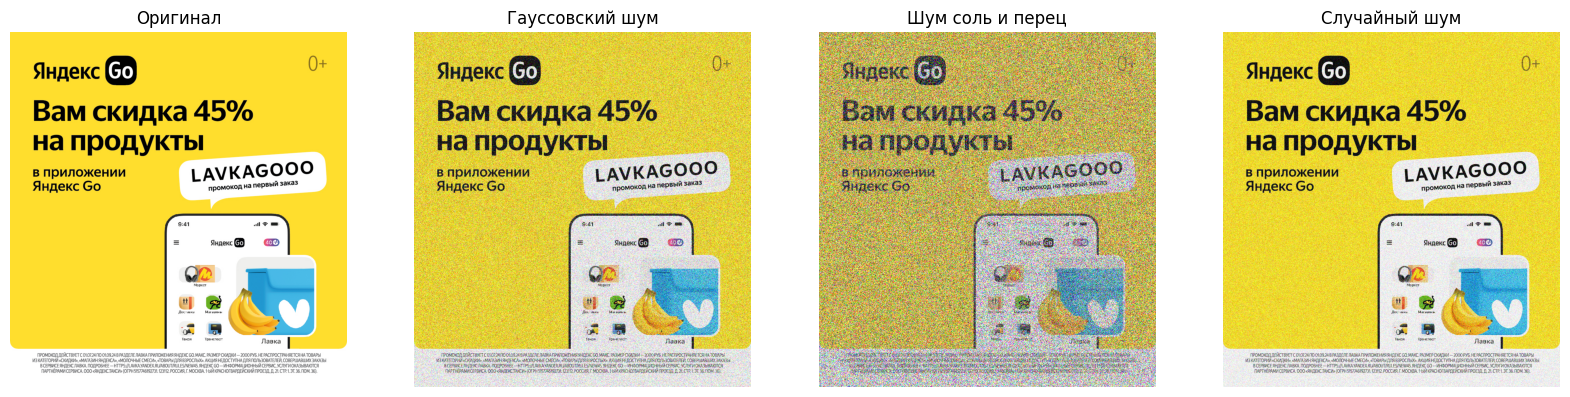


Сравнение для изображения 2:
Расстояние Хэмминга для шума 'Гауссовский шум': 16
Расстояние Хэмминга для шума 'Шум соль и перец': 16
Расстояние Хэмминга для шума 'Случайный шум': 16


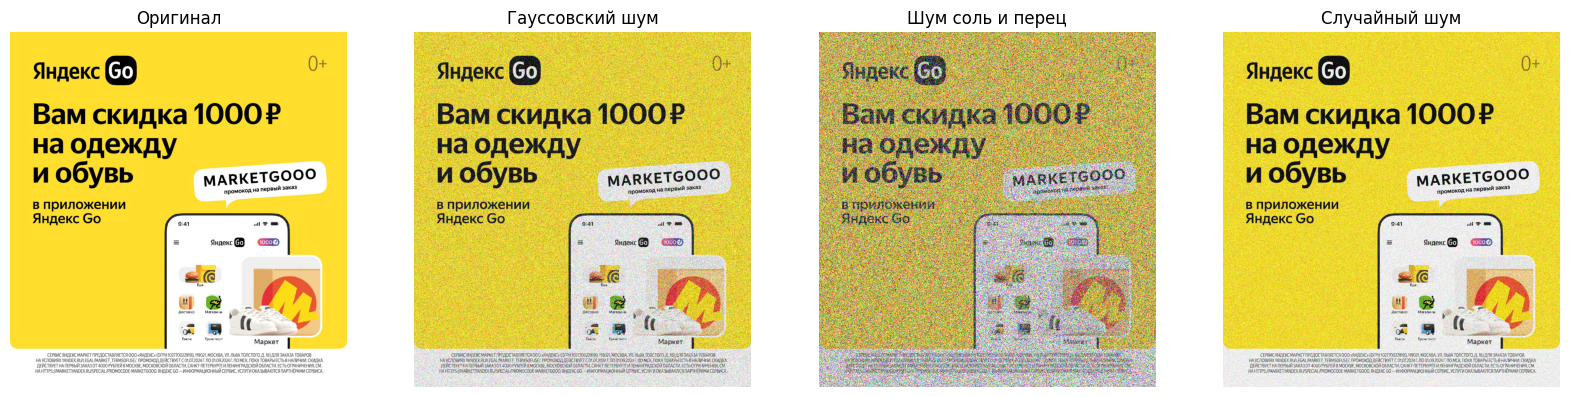


Сравнение для изображения 3:
Расстояние Хэмминга для шума 'Гауссовский шум': 15
Расстояние Хэмминга для шума 'Шум соль и перец': 15
Расстояние Хэмминга для шума 'Случайный шум': 15


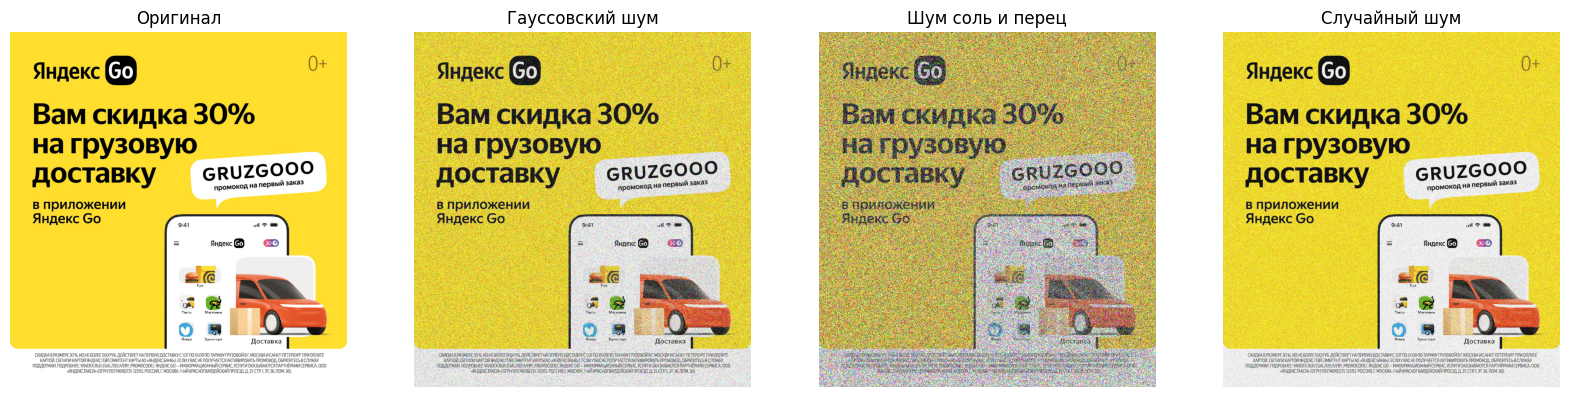


Сравнение для изображения 4:
Расстояние Хэмминга для шума 'Гауссовский шум': 5
Расстояние Хэмминга для шума 'Шум соль и перец': 4
Расстояние Хэмминга для шума 'Случайный шум': 5


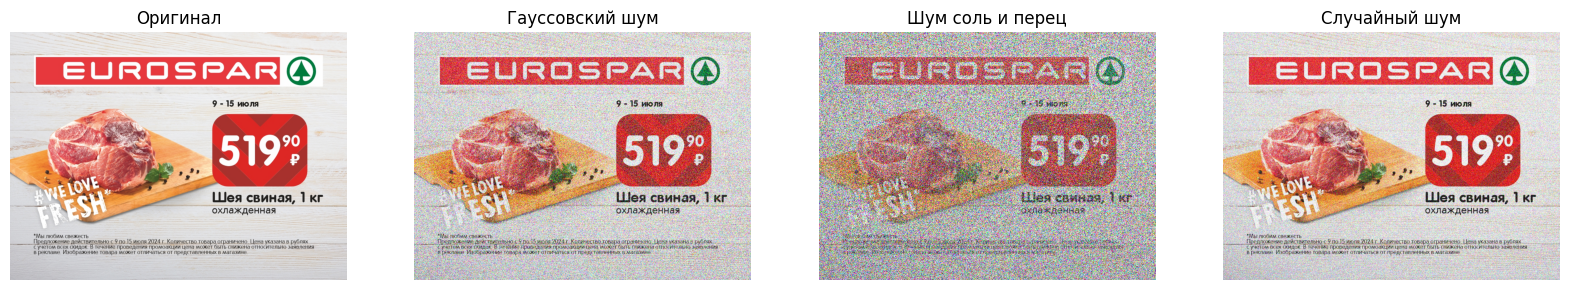


Сравнение для изображения 5:
Расстояние Хэмминга для шума 'Гауссовский шум': 20
Расстояние Хэмминга для шума 'Шум соль и перец': 19
Расстояние Хэмминга для шума 'Случайный шум': 19


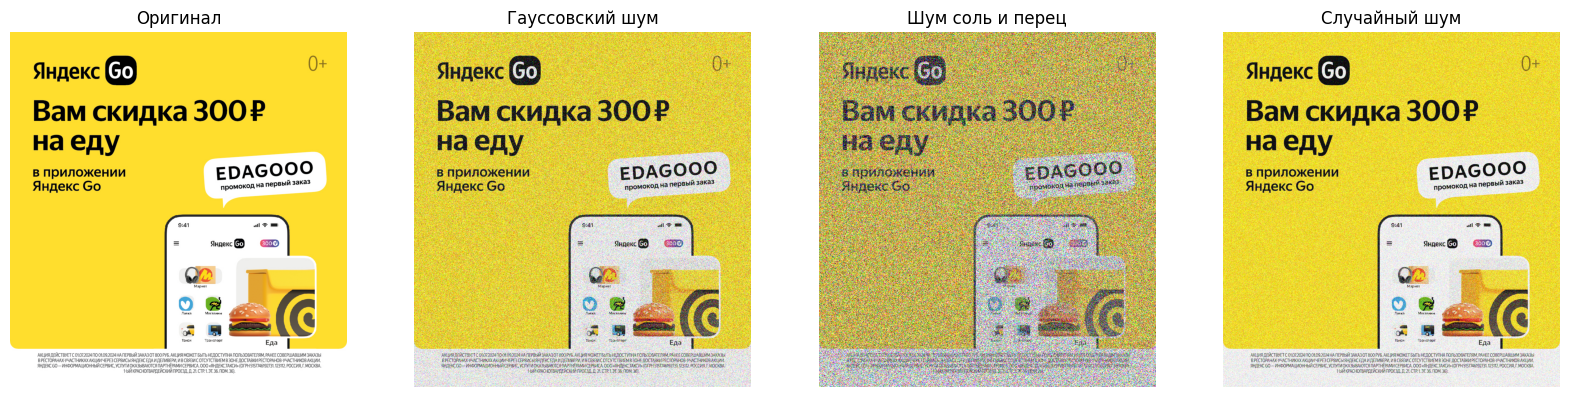


Сравнение для изображения 6:
Расстояние Хэмминга для шума 'Гауссовский шум': 2
Расстояние Хэмминга для шума 'Шум соль и перец': 2
Расстояние Хэмминга для шума 'Случайный шум': 2


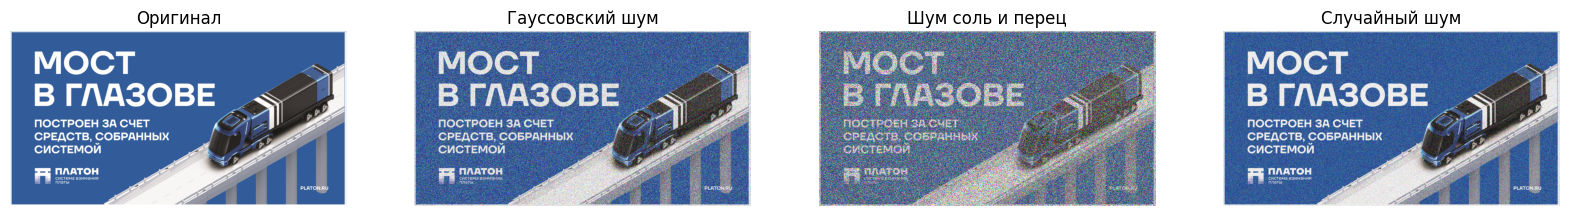


Сравнение для изображения 7:
Расстояние Хэмминга для шума 'Гауссовский шум': 6
Расстояние Хэмминга для шума 'Шум соль и перец': 5
Расстояние Хэмминга для шума 'Случайный шум': 5


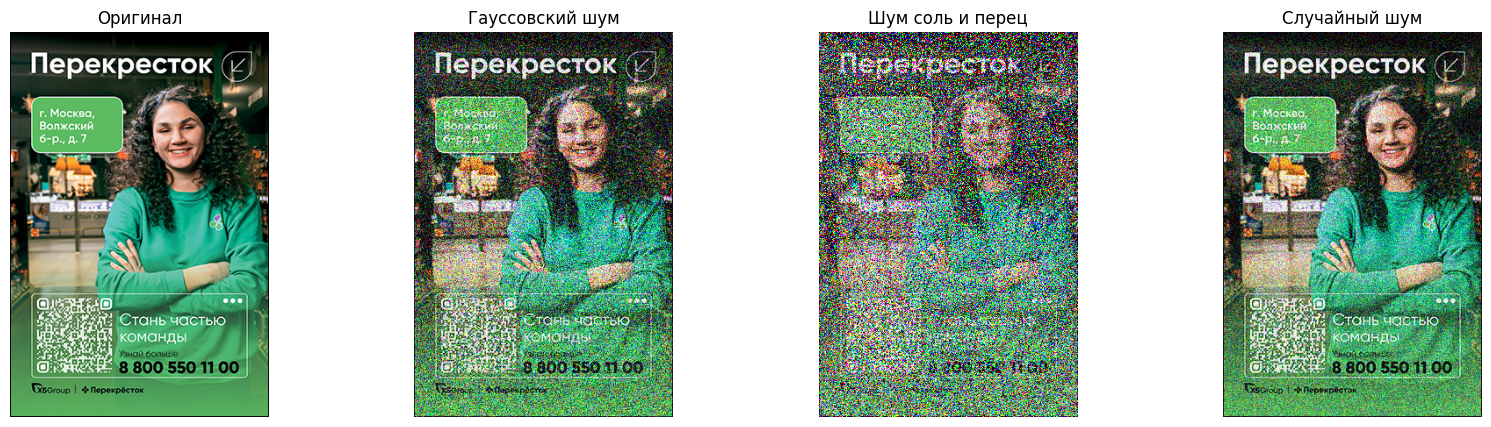

In [ ]:
# Функция для вычисления хэша изображения
def calc_image_hash(file_name, hash_type='ahash'):
    image = Image.open(file_name)
    if hash_type == 'ahash':
        return str(imagehash.average_hash(image))
    elif hash_type == 'dhash':
        return str(imagehash.dhash(image))
    elif hash_type == 'phash':
        return str(imagehash.phash(image))
    else:
        raise ValueError("Неправильный тип хэша")

# Функция для сравнения хэшей
def compare_hash(hash1, hash2):
    # Преобразуем хэши в объекты ImageHash для корректного сравнения
    hash1 = imagehash.hex_to_hash(hash1)
    hash2 = imagehash.hex_to_hash(hash2)
    return hash1 - hash2  # Возвращаем расстояние Хэмминга

# Функция для добавления шума к изображению
def add_noise(image, noise_type, amount):
    if noise_type == 'gaussian':
        noise = np.random.normal(0, amount, image.shape)
        noisy_image = image + noise
    elif noise_type == 'salt_and_pepper':
        noisy_image = image.copy()
        s_vs_p = 0.5
        out = np.random.rand(*image.shape)
        noisy_image[out < (amount * s_vs_p)] = 0  # соль
        noisy_image[out > (1 - amount * s_vs_p)] = 255  # перец
    elif noise_type == 'random':
        noisy_image = image + np.random.randint(-amount, amount, image.shape)
    else:
        raise ValueError("Неправильный тип шума")

    return np.clip(noisy_image, 0, 255).astype(np.uint8)

# Функция для визуализации изображений
def visualize_images(original, noisy_images):
    fig, axes = plt.subplots(1, len(noisy_images) + 1, figsize=(20, 5), frameon=False)
    axes[0].imshow(original)
    axes[0].set_title('Оригинал')
    axes[0].axis('off')

    for j, (noise_type, noisy_image) in enumerate(noisy_images.items()):
        axes[j + 1].imshow(noisy_image)
        axes[j + 1].set_title(noise_type)
        axes[j + 1].axis('off')

    plt.show()

# Основная часть
def main(image_paths):
    # Вычисляем хэши для изображений
    hashes = []
    for path in image_paths:
        try:
            hash_value = calc_image_hash(path, hash_type='ahash')
            hashes.append(hash_value)
            print(f"Хэш изображения {path}: {hash_value}")
        except Exception as e:
            print(f"Ошибка при обработке {path}: {e}")

    # Проверяем, были ли успешно вычислены хэши
    if not hashes:
        print("Не удалось вычислить хэши для изображений. Проверьте пути к изображениям.")
        return

    # Добавляем разные типы шумов и сравниваем хэши
    for i, path in enumerate(image_paths):
        original_image = cv2.imread(path)
        original_image_rgb = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)

        noisy_images = {
            'Гауссовский шум': add_noise(original_image_rgb, 'gaussian', 70),
            'Шум соль и перец': add_noise(original_image_rgb, 'salt_and_pepper', 0.5),
            'Случайный шум': add_noise(original_image_rgb, 'random', 70)
        }

        print(f"\nСравнение для изображения {i + 1}:")
        original_hash = hashes[i]
        for noise_type, noisy_image in noisy_images.items():
            # Сохраняем зашумленное изображение во временный файл для вычисления хэша
            temp_image_path = 'temp_noisy_image.jpg'
            cv2.imwrite(temp_image_path, noisy_image)
            noisy_hash = calc_image_hash(temp_image_path, hash_type='ahash')
            distance = compare_hash(original_hash, noisy_hash)
            print(f"Расстояние Хэмминга для шума '{noise_type}': {distance}")

        # Визуализируем оригинальное и зашумленные изображения
        visualize_images(original_image_rgb, noisy_images)

# Пример путей к изображениям
image_paths = [
    '/content/drive/MyDrive/Rabota/Pandas_exel/Dash_plotly_matplotlib/Dmitrii/image/1994949.jpg',
    '/content/drive/MyDrive/Rabota/Pandas_exel/Dash_plotly_matplotlib/Dmitrii/image/1994950.jpg',
    '/content/drive/MyDrive/Rabota/Pandas_exel/Dash_plotly_matplotlib/Dmitrii/image/1994947.jpg',
    '/content/drive/MyDrive/Rabota/Pandas_exel/Dash_plotly_matplotlib/Dmitrii/image/1994477.jpg',
    '/content/drive/MyDrive/Rabota/Pandas_exel/Dash_plotly_matplotlib/Dmitrii/image/1994948.jpg',
    '/content/drive/MyDrive/Rabota/Pandas_exel/Dash_plotly_matplotlib/Dmitrii/image/1996145.png',
    '/content/drive/MyDrive/Rabota/Pandas_exel/Dash_plotly_matplotlib/Dmitrii/image/1998586.jpg'
]

# Запуск основной программы
if __name__ == "__main__":
    main(image_paths)
